In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [12]:
df_tesla = yf.download('TSLA') # 2010-06-29 to 2024-02-02

/Users/weishanhe/opt/miniconda3/envs/ml_env/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

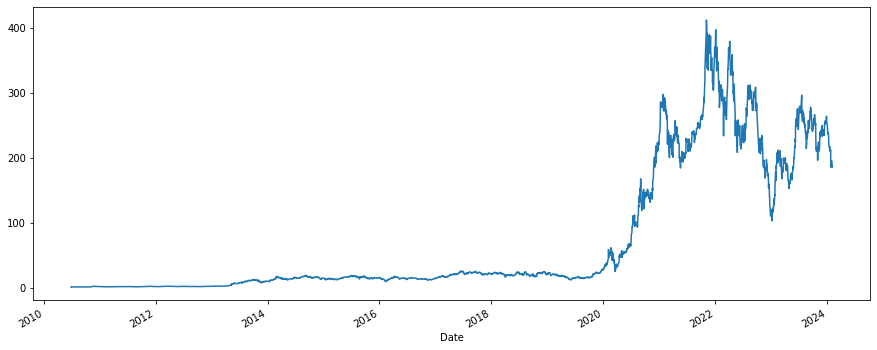

In [13]:
# simple moving average - smooths out price data by creating a constantly updated average price
df_tesla['Open'].plot(figsize=(15, 6))


In [18]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

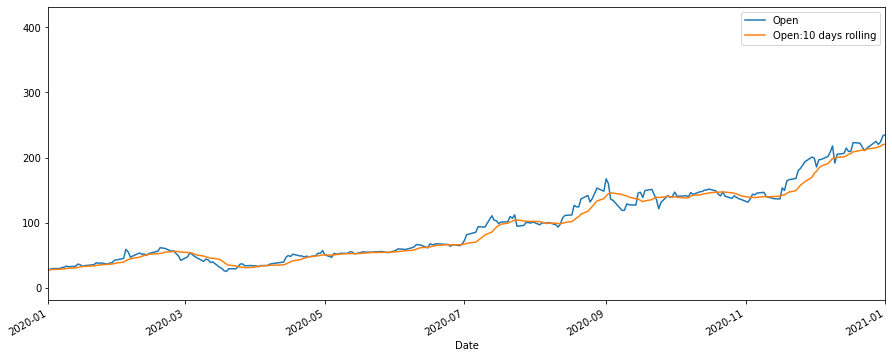

In [20]:
df_tesla[['Open', 'Open:10 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15, 6))

<AxesSubplot:xlabel='Date'>

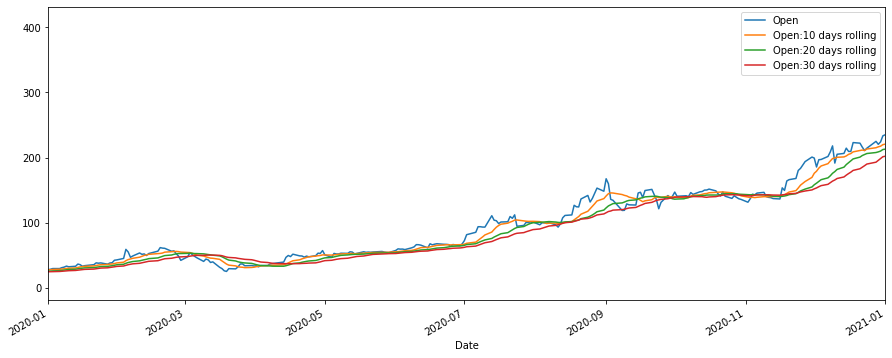

In [25]:
df_tesla['Open:20 days rolling'] = df_tesla['Open'].rolling(window=20, min_periods=1).mean()
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla[['Open', 'Open:10 days rolling', 'Open:20 days rolling', 'Open:30 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15, 6))

Disadvantages of simple moving average
- similar importance to all data points: (x_1 + x_2 + ... + x_n) / n. Our model should give more importance/weight to recent data points.

## Cumulative Moving Average
- The cumulative moving average (CMA) is the average of all data points up to the current point.

<AxesSubplot:xlabel='Date'>

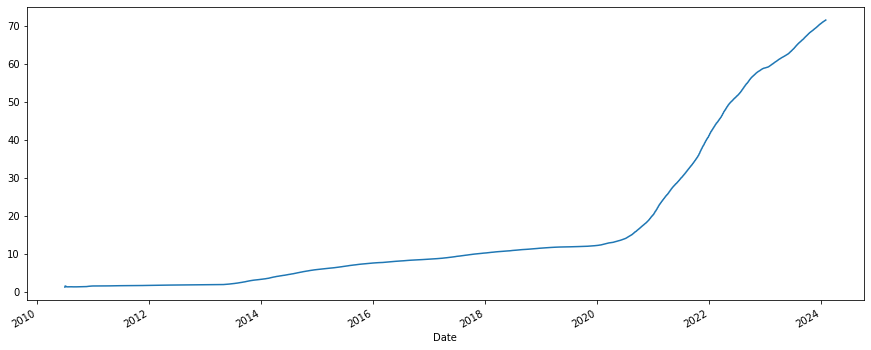

In [26]:
## Expending - cumulative moving average
df_tesla['Open'].expanding().mean().plot(figsize=(15, 6))

## EWMA (Exponential Weighted Moving Average)
- The EWMA is a weighted average of the previous data points, with exponentially decreasing weights. The EWMA is a better choice than the SMA and CMA for modeling time series data, as it gives more importance to recent data points (prevent lags).
- EWMA(t) = (1 - alpha) * EWMA(t-1) + alpha * x_t, where alpha is the smoothing factor, and x_t is the current data point. The smoothing factor is a value between 0 and 1, and it determines the weight of the current data point. A higher alpha gives more weight to the current data point, and a lower alpha gives more weight to the previous EWMA. The first EWMA is the simple moving average of the first n data points, and the EWMA for the next data point is calculated using the previous EWMA and the current data point.

In [27]:
df_tesla['EWMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

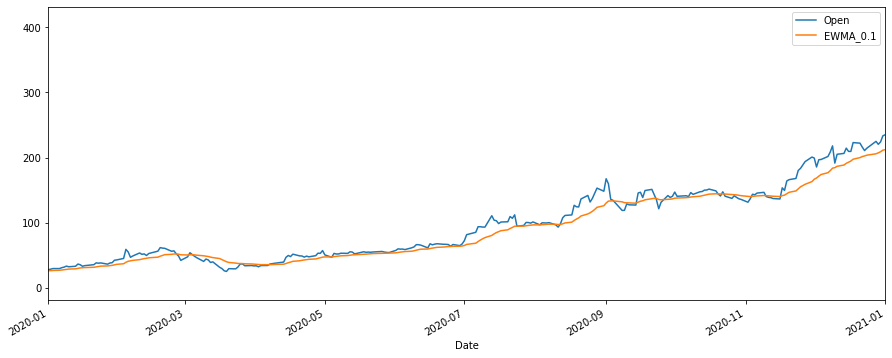

In [28]:
df_tesla[['Open', 'EWMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15, 6))

<AxesSubplot:xlabel='Date'>

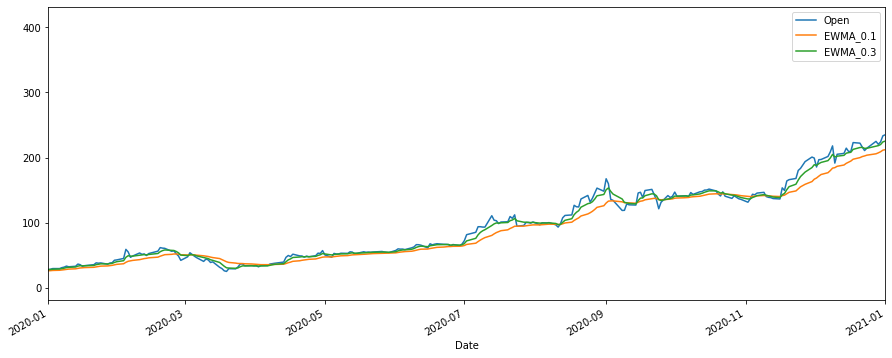

In [29]:
df_tesla['EWMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()
df_tesla[['Open', 'EWMA_0.1', 'EWMA_0.3']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15, 6))


In [30]:
# alpha = 2 / (span + 1)
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

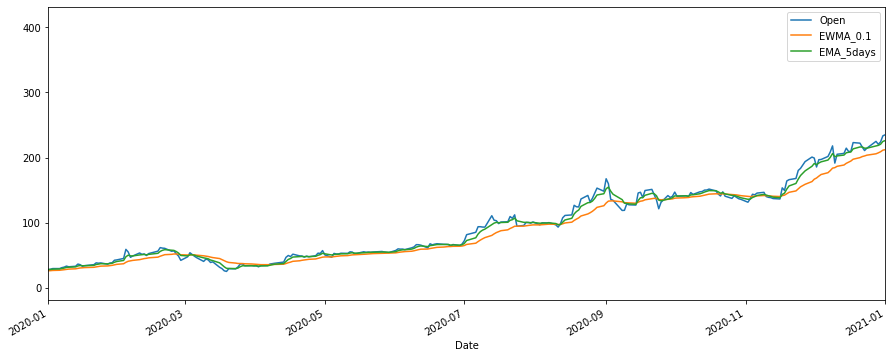

In [32]:
df_tesla[['Open', 'EWMA_0.1', 'EMA_5days']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15, 6))

ARIMA: AR + I + MA
- AR: Auto-Regressive
- I: Integrated
- MA: Moving Average
AR + MA = ARMA: Auto-Regressive Moving Average. It is used for forecasting sales, monthly production, and other time series data.
For moving average, do you use PACF or ACF plot?
- ACF: Auto-Correlation Function. It is used to find the correlation between the time series data and its lagged values. The ACF is used to find the moving average (MA) order in the ARMA model.
- PACF: Partial Auto-Correlation Function. It is used to find the correlation between the time series data and its lagged values, after removing the effect of the intermediate lagged values. The PACF is used to find the auto-regressive (AR) order in the ARMA model.

What is moving average model?
- The moving average (MA) model is used to model the time series data, where the current data point is a linear combination of the previous data points and the error terms. The MA model is used to model the noise in the time series data, and it is used in the ARMA model for forecasting time series data. <br>
$MA = \mu + \phi_1 * \epsilon_{t-1}$, <br>
where $\mu$ is the mean of the time series data, $\phi_1$ is the coefficient of the previous error term, and $\epsilon_{t-1}$ is the error term at time t-1, and /epsilon follow standardized normal distribution ($\mu=0$, $\sigma=1$).